In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
customer_df = pd.read_csv('./we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.head())
customer_df.info()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Open the categoricals variable we created before

In [18]:
categoricals = customer_df.select_dtypes(np.object)
categoricals = categoricals.drop(["Customer"], axis = 1)
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              9134 non-null   object
 1   Response           9134 non-null   object
 2   Coverage           9134 non-null   object
 3   Education          9134 non-null   object
 4   Effective To Date  9134 non-null   object
 5   EmploymentStatus   9134 non-null   object
 6   Gender             9134 non-null   object
 7   Location Code      9134 non-null   object
 8   Marital Status     9134 non-null   object
 9   Policy Type        9134 non-null   object
 10  Policy             9134 non-null   object
 11  Renew Offer Type   9134 non-null   object
 12  Sales Channel      9134 non-null   object
 13  Vehicle Class      9134 non-null   object
 14  Vehicle Size       9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


/var/folders/fw/gn4y0r6102q38_7vzn4l62mw0000gp/T/ipykernel_10472/3000649687.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


### Plot all the categorical variables with the proper plot. What can you see?

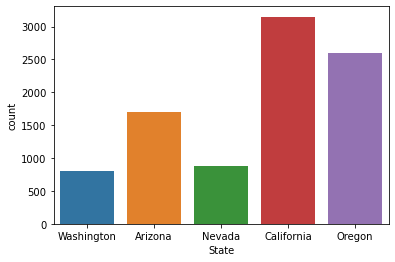

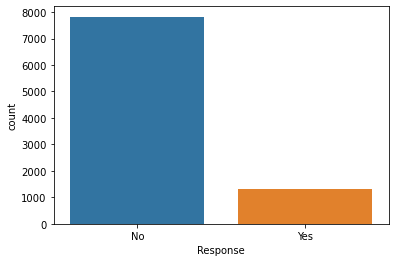

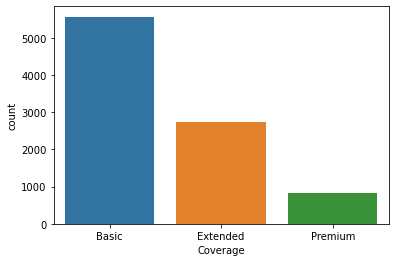

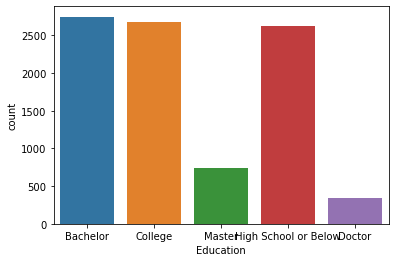

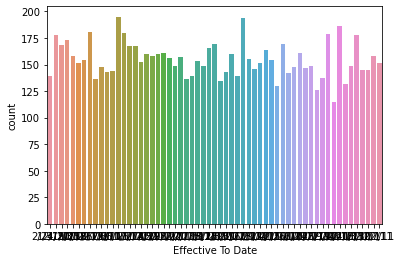

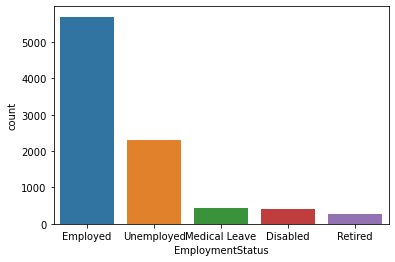

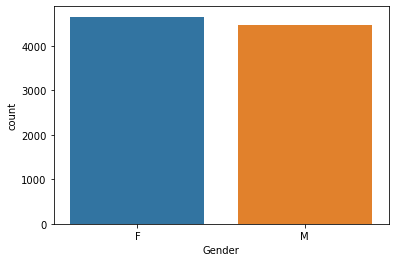

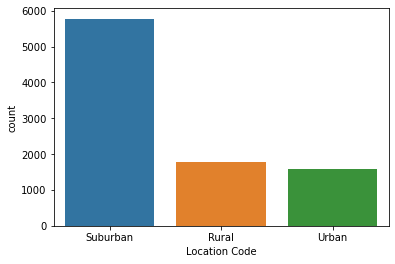

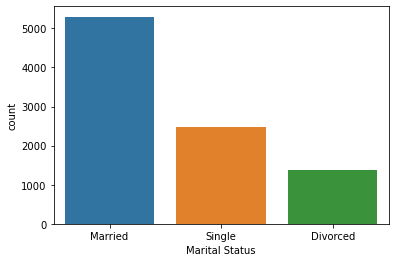

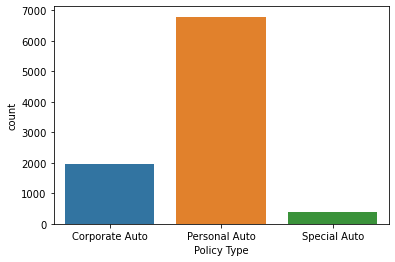

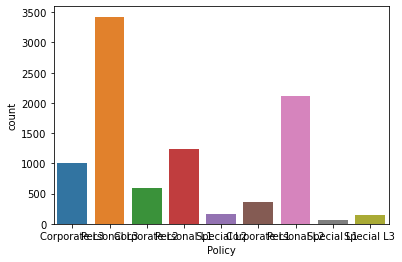

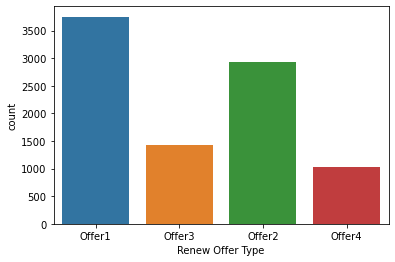

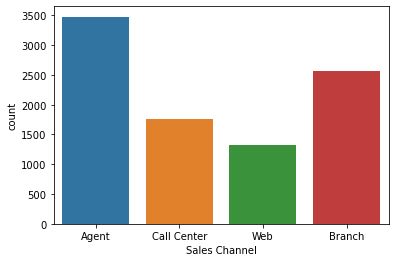

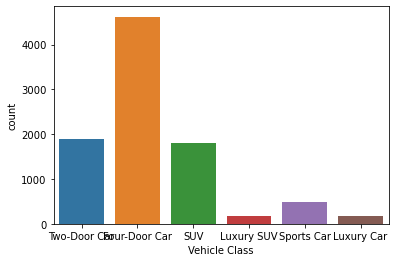

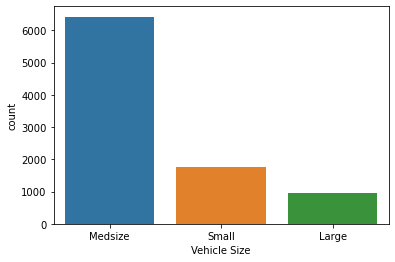

In [19]:
for col in categoricals.columns:
        sns.countplot(x = col, data = categoricals)
        plt.show()

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [20]:
print(categoricals["Policy"].value_counts())
print(categoricals["Policy Type"].value_counts())

### Policy Type seems to be contained within the Policy column. Policy seems to include levels?
### I guess we can erase Policy Type and just keep Policy.

### Just to check

policy_per = categoricals[categoricals["Policy Type"] == "Personal Auto"]
print(policy_per["Policy"].value_counts())

policy_cor = categoricals[categoricals["Policy Type"] == "Corporate Auto"]
print(policy_cor["Policy"].value_counts())

policy_spe = categoricals[categoricals["Policy Type"] == "Special Auto"]
print(policy_spe["Policy"].value_counts())

### It indeed seems to be that Policy Type is contained within the Policy column, so I 
### will erase the Policy Type column 

categoricals = categoricals.drop(["Policy Type"], axis = 1)


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Personal L3    3426
Personal L2    2122
Personal L1    1240
Name: Policy, dtype: int64
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Name: Policy, dtype: int64
Special L2    164
Special L3    148
Special L1     66
Name: Policy, dtype: int64


### Plot time variable. Can you extract something from it?

In [25]:
### The time variable is plotted above. It is very hard to see anything in that plot. What we
### might try is to extract year, month and day and then plot these.

categoricals['Effective To Date']=pd.to_datetime(categoricals['Effective To Date'])
date = categoricals[["Effective To Date"]]
date['day'] = date['Effective To Date'].dt.strftime('%d')
date['day'] = pd.to_numeric(date['day'])
date['month'] = date['Effective To Date'].dt.strftime('%m')
date['month'] = pd.to_numeric(date['month'])
date['year'] = date['Effective To Date'].dt.strftime('%y')
date['year'] = pd.to_numeric(date['year'])
date = date[["day", "month", "year"]]
date

/var/folders/fw/gn4y0r6102q38_7vzn4l62mw0000gp/T/ipykernel_10472/4027713356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date['day'] = date['Effective To Date'].dt.strftime('%d')
/var/folders/fw/gn4y0r6102q38_7vzn4l62mw0000gp/T/ipykernel_10472/4027713356.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date['day'] = pd.to_numeric(date['day'])
/var/folders/fw/gn4y0r6102q38_7vzn4l62mw0000gp/T/ipykernel_10472/4027713356.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,day,month,year
0,24,2,11
1,31,1,11
2,19,2,11
3,20,1,11
4,3,2,11
...,...,...,...
9129,10,2,11
9130,12,2,11
9131,6,2,11
9132,3,2,11


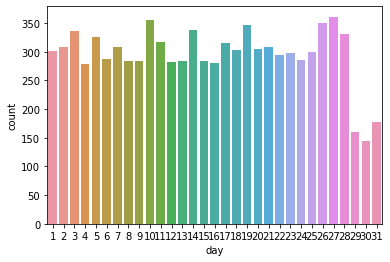

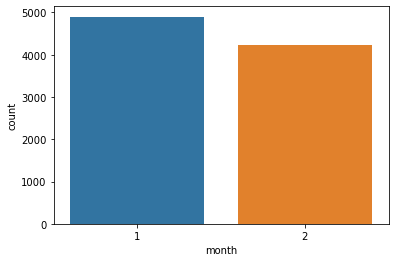

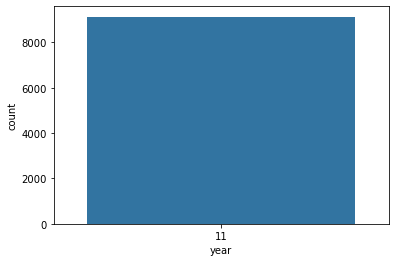

In [26]:
for col in date.columns:
        sns.countplot(x = col, data = date)
        plt.show()